In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set ()

In [7]:
T, dt, f = 0.256, 0.001, 25

import bruges
w, t = bruges.filters.ricker(T, dt, f, return_t=True)

import scipy.signal
f_W, W = scipy.signal.welch(w, fs=1/dt, nperseg=256)

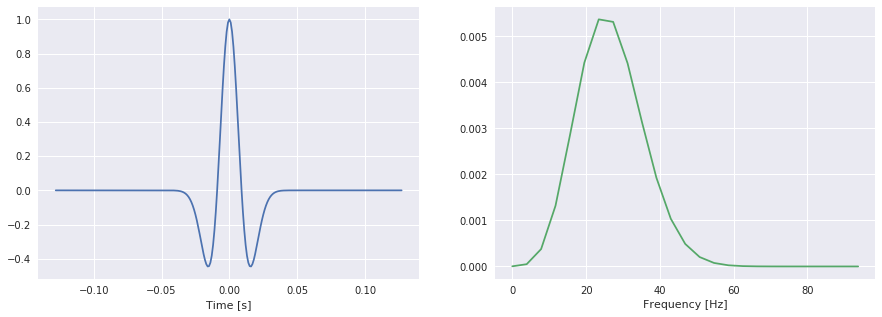

In [8]:
fig, axs = plt.subplots(figsize=(15,5), ncols=2)
axs[0].plot(t, w)
axs[0].set_xlabel("Time [s]")
axs[1].plot(f_W[:25], W[:25], c="C1")
axs[1].set_xlabel("Frequency [Hz]")
plt.show()

In [9]:
c = np.cos(2*25*np.pi*t)

f_C, C = scipy.signal.welch(c, fs=1/dt, nperseg=256)

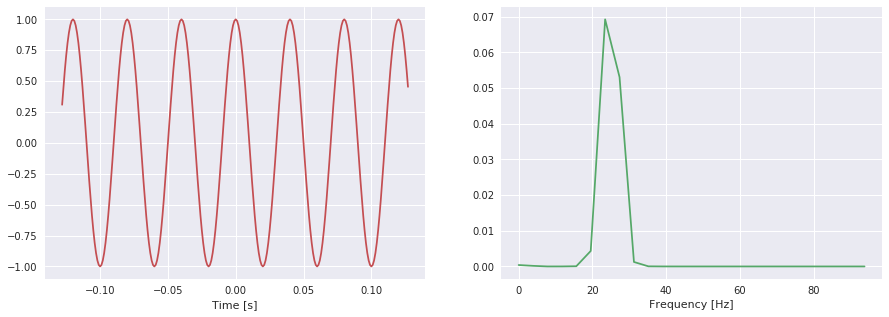

In [10]:
fig, axs = plt.subplots(figsize=(15,5), ncols=2)
axs[0].plot(t, c, c="C2")
axs[0].set_xlabel("Time [s]")
axs[1].plot(f_C[:25], C[:25], c="C1")
axs[1].set_xlabel("Frequency [Hz]")
plt.show()

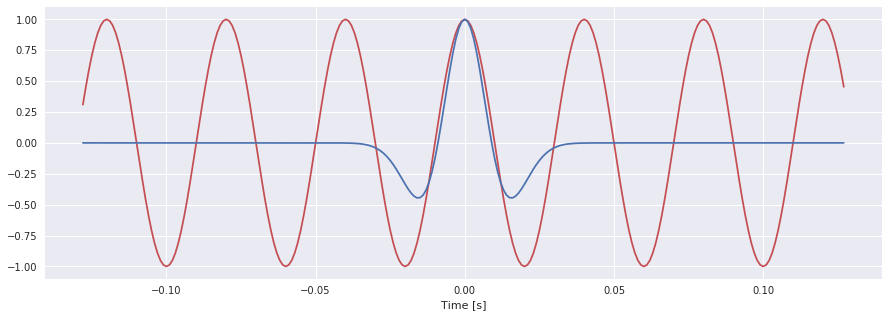

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(t, c, c='C2')
plt.plot(t, w)
plt.xlabel("Time [s]")
plt.show()

In [12]:
def ricker(t, f):
    return (1 - 2*(np.pi*f*t)**2) * np.exp(-(np.pi*f*t)**2)

In [13]:
f = 25
np.allclose(w, ricker(t, f=25))

True

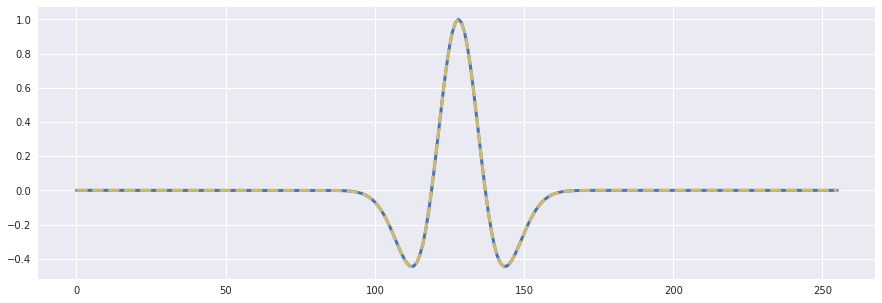

In [14]:
plt.figure(figsize=(15, 5))
plt.plot(w, lw=3)
plt.plot(ricker(t, f), '--', c='C4', lw=3)
plt.show()

In [15]:
import scipy.optimize

f = 25

scipy.optimize.minimize(ricker, x0=0, args=(f))

      fun: -0.4462603202963996
 hess_inv: array([[1]])
      jac: array([-2.19792128e-07])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 1
     njev: 10
   status: 0
  success: True
        x: array([0.01559393])

In [16]:
(0.02 - 0.01559) / 0.02

0.22050000000000003

In [17]:
import sympy as sp

t = sp.Symbol('t')
f = sp.Symbol('f')

r = (1 - 2*(sp.pi*f*t)**2) * sp.exp(-(sp.pi*f*t)**2)

In [18]:
sp.solvers.solve(r, t)

[-sqrt(2)/(2*pi*f), sqrt(2)/(2*pi*f)]

In [19]:
dwdt = sp.diff(r, t)
sp.solvers.solve(dwdt, t)

[0, -sqrt(6)/(2*pi*f), sqrt(6)/(2*pi*f)]

In [20]:
np.sqrt(6) / (2 * np.pi * 25)

0.015593936024673521

In [21]:
r.subs({t: sp.sqrt(6)/(2*sp.pi*f)})

-2*exp(-3/2)

In [22]:
(np.pi * 25) / np.sqrt(6)

32.06374575404661

In [23]:
32.064 * np.sqrt(6) / (np.pi)

25.00019823475659

In [24]:
np.sqrt(6) / np.pi

0.779696801233676